In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, GlobalAveragePooling2D, Activation, BatchNormalization, Dropout
from tensorflow.keras import Sequential, backend, optimizers
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img




In [ ]:
from zipfile import ZipFile

# Specify the path to the zip file
file_name = '/content/mldataset.zip'

# Open the zip file in read mode
with ZipFile(file_name, 'r') as zip:
    # Extract all contents to the current directory
    zip.extractall()

print("Extraction completed!")

Extraction completed!


In [ ]:
parasitized_data = os.listdir('/content/mldataset/Effected')
uninfected_data = os.listdir('/content/mldataset/Uneffected')
data = []
labels = []
for img in parasitized_data:
    try:
        img_read = plt.imread('/content/mldataset/Effected/' + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        None

for img in uninfected_data:
    try:
        img_read = plt.imread('/content/mldataset/Uneffected/' + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None

image_data = np.array(data)
labels = np.array(labels)
print("image_data:",len(image_data))
print("labels:",len(labels))

image_data: 13660
labels: 13660


Parasitized Sample:



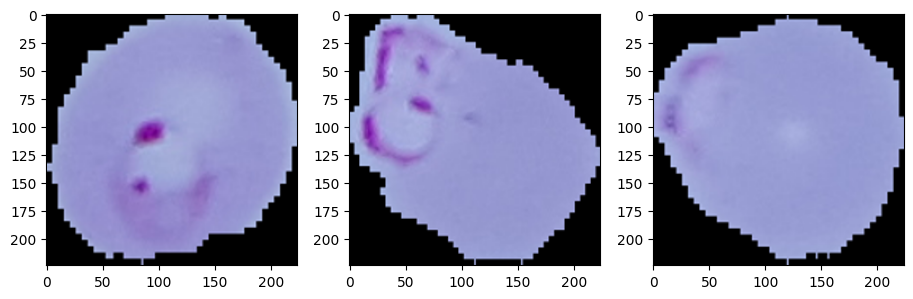

Uninfected Sample:



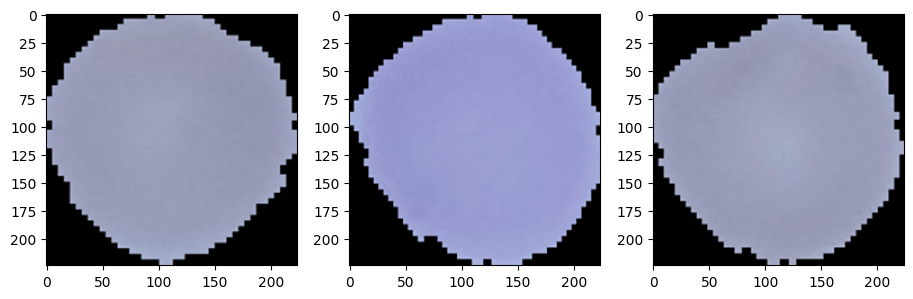

In [ ]:
print("Parasitized Sample:\n")
plt.figure(figsize = (15,15))
for i in range(3):
    plt.subplot(4, 4, i+1)
    img = cv2.imread('/content/mldataset/Effected/'+ parasitized_data[i])
    plt.imshow(img)
plt.show()

print("Uninfected Sample:\n")
plt.figure(figsize = (15,15))
for i in range(3):
    plt.subplot(4, 4, i+1)
    img = cv2.imread('/content/mldataset/Uneffected/'+ uninfected_data[i])
    plt.imshow(img)
plt.show()

In [ ]:
from tensorflow.keras.utils import to_categorical

# Example usage of to_categorical
y = [0, 1, 2, 3]
y_categorical = to_categorical(y, num_classes=4)

print(y_categorical)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Split the data
X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size=0.2, random_state=0)

# Convert labels to categorical format
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

# Print the lengths of each dataset
print("X_train:", len(X_train))
print("X_test:", len(X_test))
print("y_train:", len(y_train))
print("y_test:", len(y_test))


X_train: 10928
X_test: 2732
y_train: 10928
y_test: 2732


In [ ]:
model = Sequential()

inputShape = (50, 50, 3)

if backend.image_data_format() == 'channels_first':
          inputShape = (3, 50, 50)
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = inputShape))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.5))
model.add(Dense(2, activation = 'softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 24, 24, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 22, 22, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 11, 11, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 11, 11, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 11, 11, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 9, 9, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 4, 4, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 285,506 (1.09 MB)

 Trainable params: 284,290 (1.08 MB)

 Non-trainable params: 1,216 (4.75 KB)

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs = 20, batch_size = 32)

Epoch 1/20
342/342 ━━━━━━━━━━━━━━━━━━━━ 44s 114ms/step - accuracy: 0.6214 - loss: 0.9436
Epoch 2/20
342/342 ━━━━━━━━━━━━━━━━━━━━ 42s 118ms/step - accuracy: 0.8191 - loss: 0.4085
Epoch 3/20
342/342 ━━━━━━━━━━━━━━━━━━━━ 41s 118ms/step - accuracy: 0.9098 - loss: 0.2363
Epoch 4/20
342/342 ━━━━━━━━━━━━━━━━━━━━ 41s 118ms/step - accuracy: 0.9312 - loss: 0.1975
Epoch 5/20
342/342 ━━━━━━━━━━━━━━━━━━━━ 39s 115ms/step - accuracy: 0.9360 - loss: 0.1749
Epoch 6/20
342/342 ━━━━━━━━━━━━━━━━━━━━ 41s 114ms/step - accuracy: 0.9416 - loss: 0.1617
Epoch 7/20
342/342 ━━━━━━━━━━━━━━━━━━━━ 41s 119ms/step - accuracy: 0.9440 - loss: 0.1613
Epoch 8/20
342/342 ━━━━━━━━━━━━━━━━━━━━ 42s 122ms/step - accuracy: 0.9462 - loss: 0.1571
Epoch 9/20
342/342 ━━━━━━━━━━━━━━━━━━━━ 82s 121ms/step - accuracy: 0.9487 - loss: 0.1596
Epoch 10/20
342/342 ━━━━━━━━━━━━━━━━━━━━ 83s 125ms/step - accuracy: 0.9471 - loss: 0.1528
Epoch 11/20
342/342 ━━━━━━━━━━━━━━━━━━━━ 90s 150ms/step - accuracy: 0.9505 - loss: 0.1473
Epoch 12/20
342/342

In [ ]:
predict = model.evaluate(X_test, y_test)
print("Loss: ",predict[0])
print("Accuracy: ",predict[1]*100)

86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.9507 - loss: 0.1616
Loss:  0.15419061481952667
Accuracy:  95.09516954421997


In [ ]:
from keras.preprocessing import image
img_path = '/content/mldataset/Uneffected/C100P61ThinF_IMG_20150918_144348_cell_108.png'
img = image.load_img(img_path, target_size=(50,50))

In [ ]:
# Convert image to array and scale it (if needed)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize if your model was trained with normalized data


predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)  # Get the class with highest probability

# Interpret the prediction
if predicted_class == 0:
    print("Predicted: Uninfected")
else:
    print("Predicted: Infected")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted: Uninfected
